# Bike Sharing Project

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
- We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
# Importing necessery libraries and packages

import pandas as pd # to handle dataframes
import numpy as np # to perform numerical computations
import matplotlib.pyplot as plt # to visualise the data, and to bring matplotlib inline with seaborn
%matplotlib inline
import seaborn as sns # to visualise the data, expescially scatters and pairplots
import warnings # to exclude the ignoreable warnings thrown by Seaborn
warnings.filterwarnings("ignore") # to filter the ignored warnings
import statsmodels.api as sm # statsmodel to get deeper stats report of model and to create model
import sklearn # to do feature selection, VIF and other analysis
from sklearn.metrics import r2_score # calculating R2 score
from sklearn.preprocessing import MinMaxScaler # to Scale the data
from sklearn.feature_selection import RFE # to do recursive feature elimination
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # to split the data to test and train
from statsmodels.stats.outliers_influence import variance_inflation_factor # to calcualte the VIF of different variables

In [2]:
sns.set_style(style="whitegrid")

# Data Analysis and Preprocessing the Data:-

## Steps to follow
- Step-1:- Reading and Understanding the Data
- Step-2:- Validating the data by verifying, dealing with missing values and datatypes
- Step-3:- Analysing the Data and identifying Variables that can be useful in creating the model
- Step-4:- Mapping the variables 
- Step-5:- Creating Dummy Variables
- Step-6:- Splitting the data to test and train
- Step-7:- Scaling the Train Data(exclude the Y_variable i.e; predictive variable)

## Step-1:- Reading and Understanding the Data

In [3]:
#loading the data and naming the bike sharing dataset as "bd" meaning "Bike Dataset"

bd = pd.read_csv("day.csv")

In [4]:
#reading the data

bd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bd.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [7]:
bd.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

#### Observations
1. instant - is indicating like a serial number or index or row number for dataset and can be completely ignored while doing analysis
2. dteday - is date for which the data is related to, as the other date related information is provided, we need to get day of month from this information and treat "day of month as continous variable"
3. yr - year can be still a variable because the present dataset has 2 distinct values(0,1), but the streaming in data could be for a latest year or any.
4. season, mnth, weekday, weathersit are categorical data, so needs mapping and creating dummy variables
5. temp, atemp, hum, windspeed should be scaled for a better intrepretion of model and perform good calcualtion speeds
6. casual and registered can be ignored as this data doesnot have any business relation to response variable or dependent variable(output) 
7. cnt - is our response or target variable(dependent variable)
8. No missing values and no dtype conversion is needed

In [8]:
# dropping the unnecessary variables

bd = bd.drop(["instant","casual", "registered"], axis=1)

## Step-2:- Validating the data by verifying, dealing with missing values and datatypes

In [9]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [10]:
# All dtypes are as expected before preprocessing data. 
# No missing values so no missing values treatment.

## Step-3:- Analysing the Data and identifying Variables that can be useful in creating the model


In [11]:
# Describe data
bd.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Performing Univariate Analysis

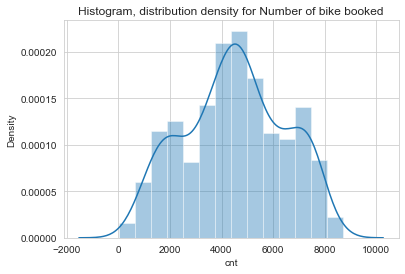

In [12]:
sns.distplot(bd.cnt, hist=True)
plt.title("Histogram, distribution density for Number of bike booked")
plt.show()

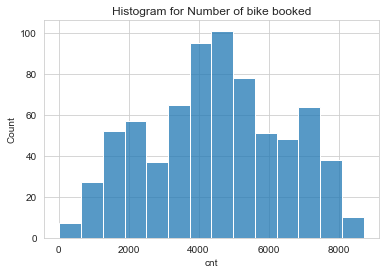

In [13]:
sns.histplot(bd.cnt)
plt.title("Histogram for Number of bike booked")
plt.show()

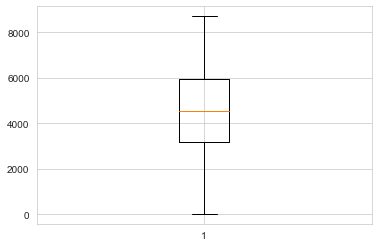

In [14]:
plt.boxplot(bd.cnt)
plt.show()

#### Observations-1
 - Data is not exactly normally distributed
 - Mean is distributed around 4000 booking
 - 50% data lies between, 2500 and 6000 app.
 - no outliers identified

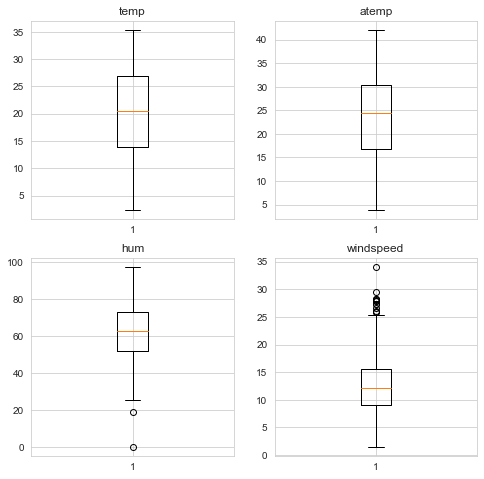

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.boxplot(bd.temp)
plt.title("temp")
plt.subplot(2,2,2)
plt.boxplot(bd.atemp)
plt.title("atemp")
plt.subplot(2,2,3)
plt.title("hum")
plt.boxplot(bd.hum)
plt.subplot(2,2,4)
plt.boxplot(bd.windspeed)
plt.title("windspeed")
plt.show()

#### Observations-2
 - Temperature on a general day feels like around 20 - 25
 - humidity on a normal day it is around 60
 - windspeed on a normal day is 10 to 15

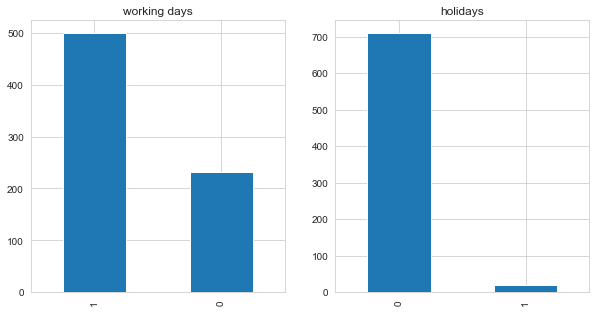

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
bd.workingday.value_counts().plot.bar()
plt.title("working days")
plt.subplot(1,2,2)
bd.holiday.value_counts().plot.bar()
plt.title("holidays")
plt.show()

#### Observations-3
 - There are a very few (21) holidays in two years and app 1/3rd of the total days are non-working days.

## Step-4:- Mapping the categorical values

In [17]:
# season, yr, mnth, holiday, weekday, workingday, weathersit

# converting seasons int to name as given dictionary
bd.season = bd.season.apply(lambda x: "spring" if x == 1 else ("summer" if x == 2 else ("fall" if x == 3 else "winter")))

# converting weathersit int to name as given dictionary
bd.weathersit = bd.weathersit.apply(lambda x: "clear" if x==1 else("mist" if x==2 else"snow-rain"))

In [18]:
#converting day int to name of the day as given in dict

def dayNameFromWeekday(weekday):
    if weekday == 0:
        return "monday"
    if weekday == 1:
        return "tuesday"
    if weekday == 2:
        return "wednesday"
    if weekday == 3:
        return "thursday"
    if weekday == 4:
        return "friday"
    if weekday == 5:
        return "saturday"
    if weekday == 6:
        return "sunday"
bd.weekday = bd.weekday.apply(dayNameFromWeekday)

In [19]:
# converting month int to name of the month as given in dictionary

import calendar
bd.mnth = bd.mnth.apply(lambda x: calendar.month_abbr[x])

In [20]:
# extracting day from date

bd["day"] = bd.dteday.apply(lambda x: x[:2])

In [21]:
# dropping date column

bd = bd.drop(["dteday"], axis=1)

In [22]:
bd.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

### Performing Bi-Variate Analysis

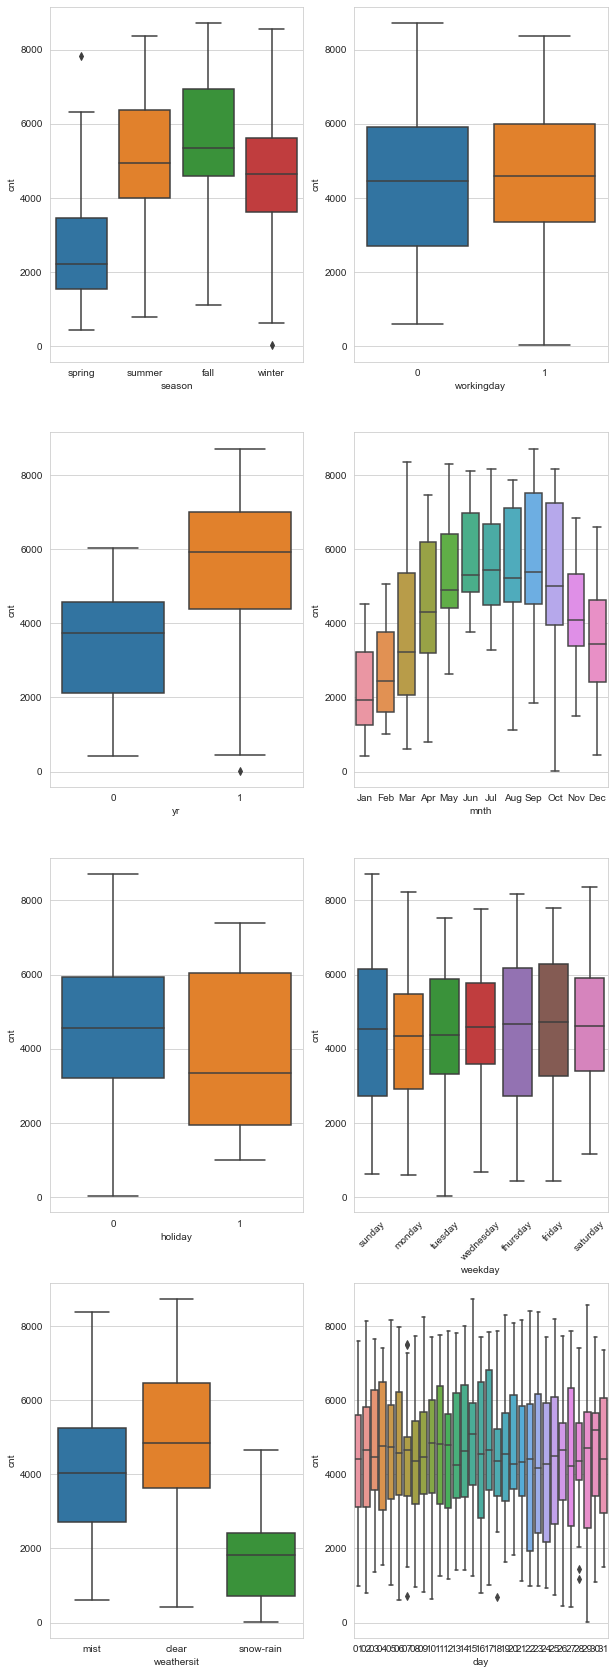

In [23]:
plt.figure(figsize=(10,30))
plt.subplot(4,2,1)
sns.boxplot(x=bd.season, y=bd.cnt)
plt.subplot(4,2,2)
sns.boxplot(x=bd.workingday, y=bd.cnt)
plt.subplot(4,2,3)
sns.boxplot(x=bd.yr, y=bd.cnt)
plt.subplot(4,2,4)
sns.boxplot(x=bd.mnth, y=bd.cnt)
plt.subplot(4,2,5)
sns.boxplot(x=bd.holiday, y=bd.cnt)
plt.subplot(4,2,6)
sns.boxplot(x=bd.weekday, y=bd.cnt)
plt.xticks(rotation=45)
plt.subplot(4,2,7)
sns.boxplot(x=bd.weathersit, y=bd.cnt)
plt.subplot(4,2,8)
sns.boxplot(x=bd.day, y=bd.cnt)
plt.show() 

#### Observations
 - During Fall the Bikes booking is high and the booking pattern follows the same as given in months analysis
 - there is an increase in bike bookings from 2018 to 2019
 - there is gradual increase in bookings from monday to friday and decreased by some number to stay constant on weekends
 - Bike bookings are more on a clear day and least on a snowy or rainy day
 - Bike Bookings are more on a working day

Note:- Intuitively we can estimate that Season, workingday, weathersit, weekday could be very good set of predictors for our reponse variable(cnt)

In [24]:
bd1=pd.read_csv("day.csv")

In [25]:
bd1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Multi Variable Analysis

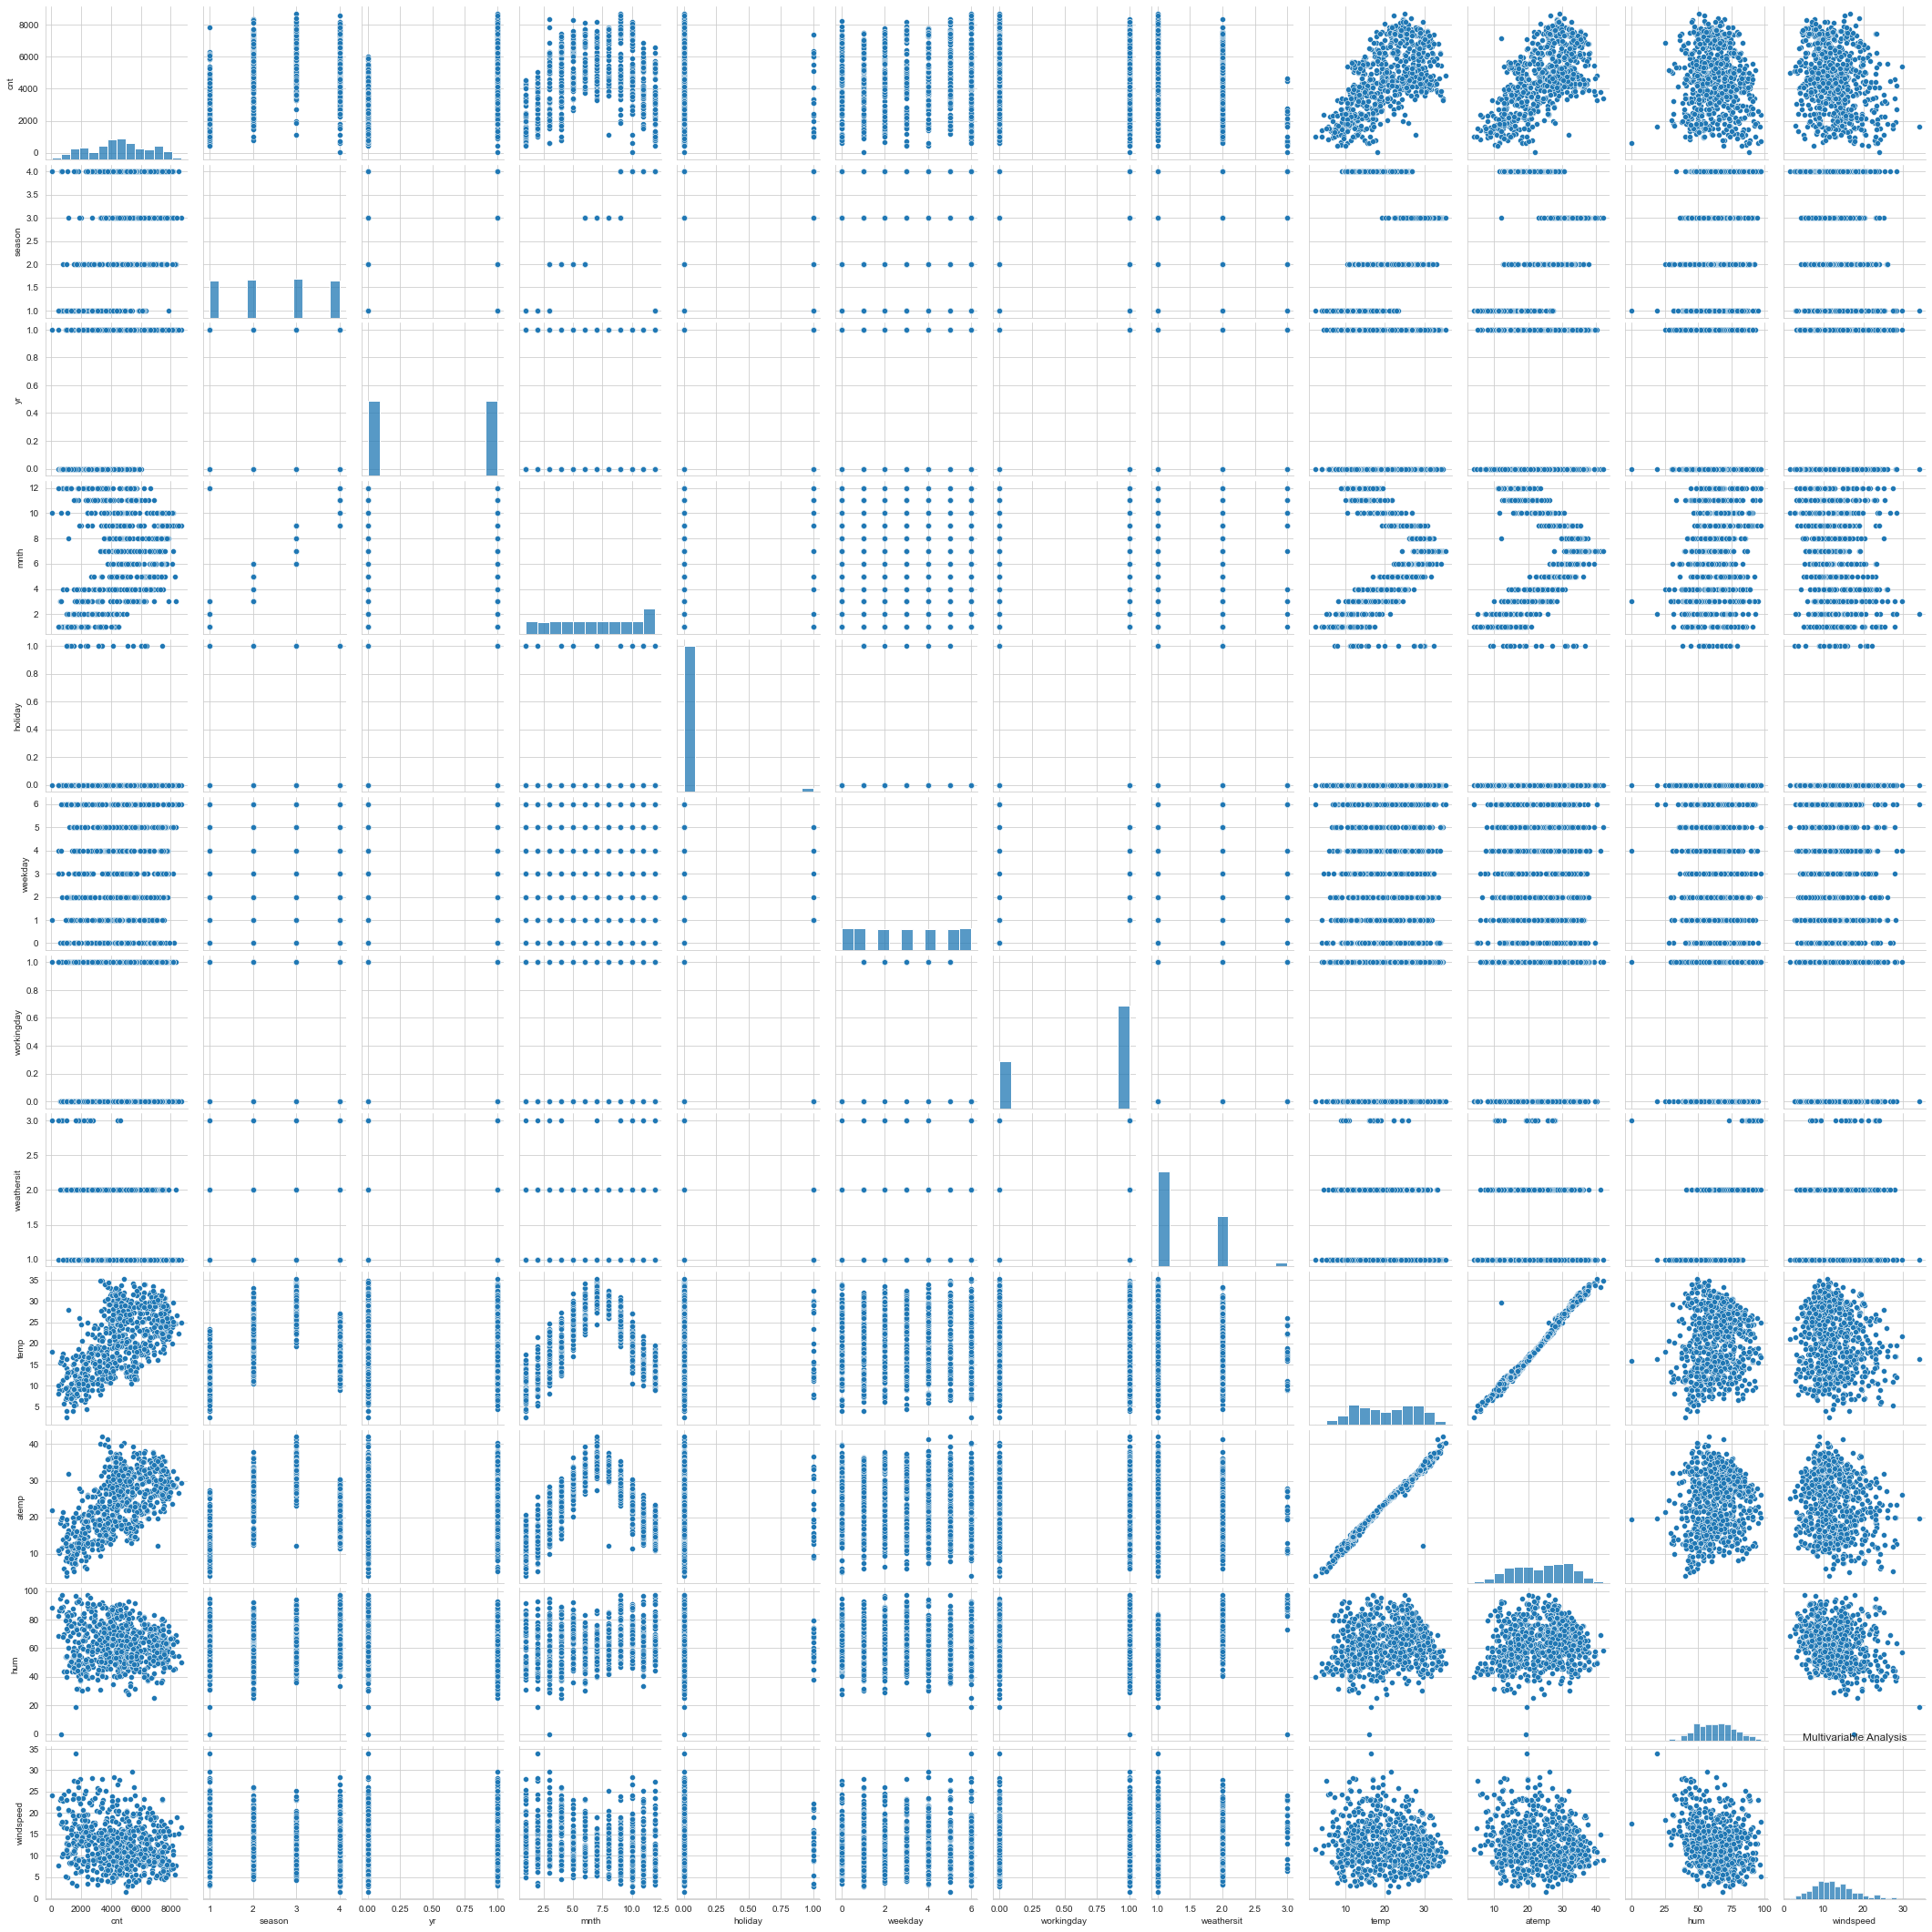

In [26]:
# Analysing the UnMapped data to understand the correlation and linearity

sns.pairplot(bd1[["cnt","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"]], kind="scatter")
plt.title("Multivariable Analysis")
plt.show()

<AxesSubplot:xlabel='day', ylabel='cnt'>

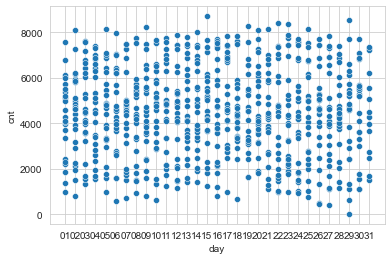

In [27]:
#scatterplot between days and bike bookings
sns.scatterplot(x=bd.day, y=bd.cnt)

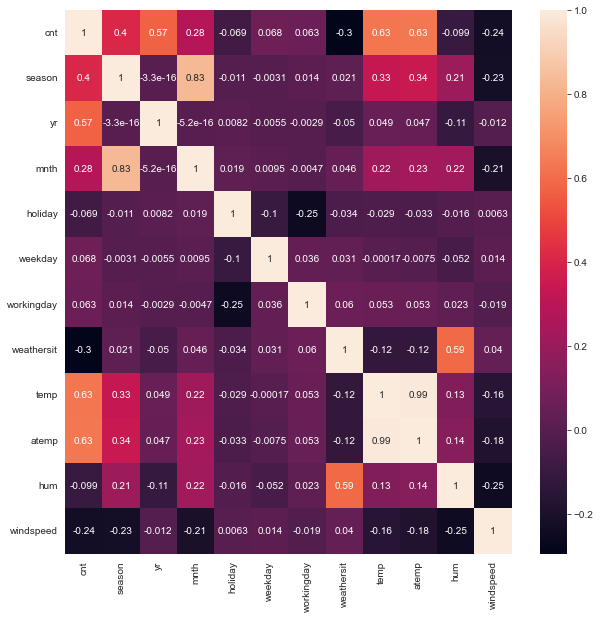

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(bd1[["cnt","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"]].corr(), annot=True)
plt.show()

## Conclusions:- 

    - Linearity between some predictive variables and response variable is observed and the Linear Modelling is appropriate for this model.
    - atemp, temp have high correlation so one them can be ignored while building model
    - both atemp and temp are strong predictors of response variable
    - year, windspeed are also going to be good predictors
    - will do correlation analysis again after creating dummy variables to figure out the relation between weekdays, month, weathersit, season.
    
    We can surely estimate that Season, weathersit, atemp or temp, windspeed, month could be very good set of predictors for our reponse variable(cnt)

## Step-5:- Creating Dummy Variables

In [29]:
bd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,Jan,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,0,Jan,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,0,Jan,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,0,Jan,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,0,Jan,0,thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,05


In [30]:
bd.day = bd.day.apply(lambda x: "day-"+x)

In [31]:
bd.day

0      day-01
1      day-02
2      day-03
3      day-04
4      day-05
        ...  
725    day-27
726    day-28
727    day-29
728    day-30
729    day-31
Name: day, Length: 730, dtype: object

In [32]:
bd.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,Jan,0,sunday,0,mist,14.110847,18.18125,80.5833,10.749882,985,day-01
1,spring,0,Jan,0,monday,0,mist,14.902598,17.68695,69.6087,16.652113,801,day-02
2,spring,0,Jan,0,tuesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,day-03
3,spring,0,Jan,0,wednesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,day-04
4,spring,0,Jan,0,thursday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,day-05


In [33]:
days_dummy = pd.get_dummies(bd.day)

In [34]:
season_dummy = pd.get_dummies(bd.season)

In [35]:
month_dummy = pd.get_dummies(bd.mnth)

In [36]:
weekday_dummy = pd.get_dummies(bd.weekday)

In [37]:
weathersit_dummy = pd.get_dummies(bd.weathersit)

In [38]:
bd = pd.concat([bd, days_dummy, season_dummy, month_dummy, weathersit_dummy, weekday_dummy], axis=1)

In [39]:
bd = bd.drop(["day","season", "mnth","weekday","weathersit"], axis=1)

In [40]:
bd.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day-01,day-02,...,clear,mist,snow-rain,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,1,0,0,0,0,0,0,1,0,0


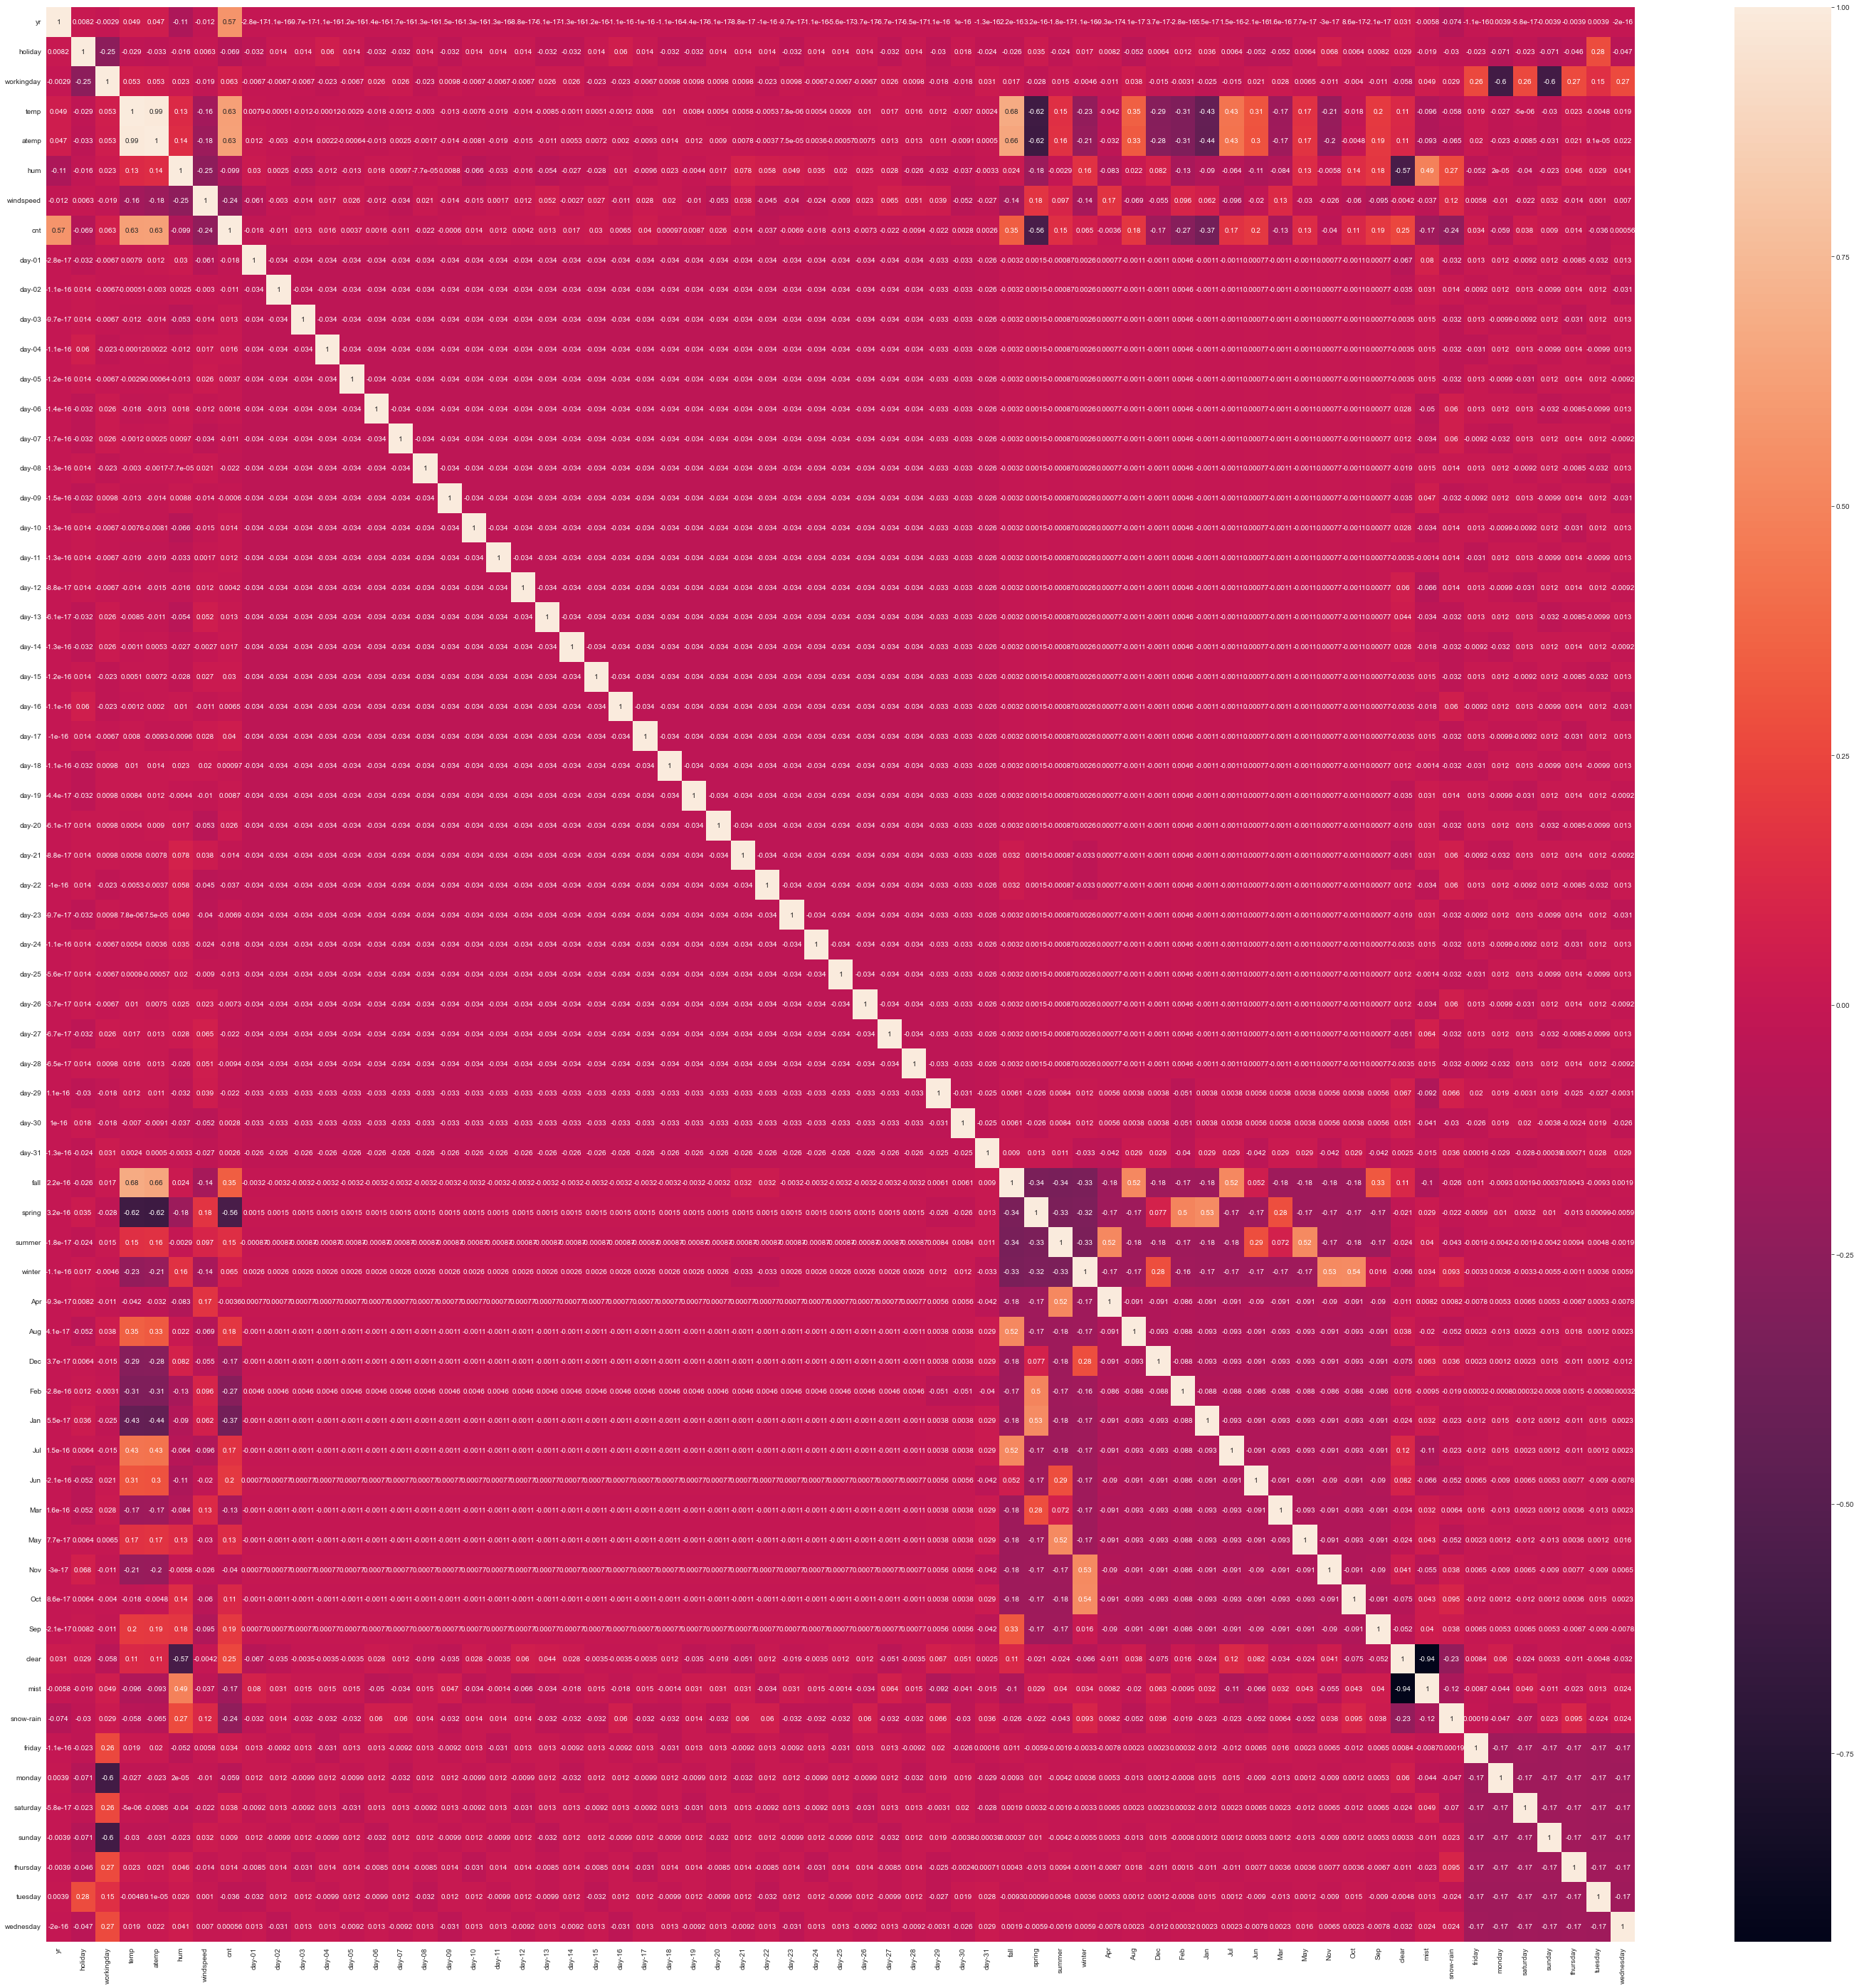

In [41]:
plt.figure(figsize=(50,50))
sns.heatmap(bd.corr(), annot=True)
plt.show()

## Dealing with Multi colinearity

- Since temp and atemp are colinear only onw amoung them must be chosed, we will choose atemp as in the real temperature out there in the atmosphere is what the users are experiencing

In [42]:
bd = bd.drop(["temp"], axis=1)

## Step-6:- Splitting the data to test and train

In [43]:
# Splitting the data to test and train in 30:70 propotations respectively

bd_train, bd_test = train_test_split(bd, train_size=0.7, random_state=100)

In [44]:
y_train = bd_train.pop("cnt")
x_train = bd_train
y_test = bd_test.pop("cnt")
x_test = bd_test

## Step-7:- Scaling the Train Data(exclude the Y_variable i.e; response variable)

In [45]:
x_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,day-01,day-02,day-03,day-04,...,clear,mist,snow-rain,friday,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,23.500287,63.123710,12.834912,0.039216,0.041176,0.037255,0.031373,...,0.625490,0.345098,0.029412,0.133333,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,8.090963,14.153170,5.292031,0.194298,0.198893,0.189572,0.174494,...,0.484471,0.475867,0.169124,0.340268,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.131150,63.437500,12.083182,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analysing the VIF of all other variables

In [46]:
vif=pd.DataFrame()
vif["Features"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
31,day-26,inf
47,Jun,inf
34,day-29,inf
35,day-30,inf
36,day-31,inf
...,...,...
29,day-24,inf
3,atemp,6.15
4,hum,2.18
5,windspeed,1.31


In [47]:
vif[vif["VIF"]<10]

,Features,VIF
3,atemp,6.15
4,hum,2.18
5,windspeed,1.31
0,yr,1.07


In [48]:
# Scaling is needed for atemp, hum, windspeed

num_vars = ["atemp", "hum", "windspeed"]

scalar = MinMaxScaler()

bd_train[num_vars] = scalar.fit_transform(bd_train[num_vars])

bd_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,day-01,day-02,day-03,day-04,...,clear,mist,snow-rain,friday,monday,saturday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.039216,0.041176,0.037255,0.031373,...,0.625490,0.345098,0.029412,0.133333,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.194298,0.198893,0.189572,0.174494,...,0.484471,0.475867,0.169124,0.340268,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling - 1

 - Creating a Model using SKlearn for Fast eliminaiton of Features using RFE

In [49]:
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(x_train, y_train)

In [50]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 52),
 ('holiday', False, 49),
 ('workingday', False, 50),
 ('atemp', False, 51),
 ('hum', False, 54),
 ('windspeed', False, 53),
 ('day-01', False, 48),
 ('day-02', False, 26),
 ('day-03', False, 43),
 ('day-04', False, 36),
 ('day-05', False, 44),
 ('day-06', False, 34),
 ('day-07', False, 47),
 ('day-08', False, 42),
 ('day-09', False, 37),
 ('day-10', False, 18),
 ('day-11', False, 20),
 ('day-12', False, 33),
 ('day-13', False, 29),
 ('day-14', False, 30),
 ('day-15', False, 23),
 ('day-16', False, 31),
 ('day-17', False, 22),
 ('day-18', False, 27),
 ('day-19', False, 25),
 ('day-20', False, 24),
 ('day-21', False, 28),
 ('day-22', False, 40),
 ('day-23', False, 19),
 ('day-24', False, 46),
 ('day-25', False, 38),
 ('day-26', False, 41),
 ('day-27', False, 35),
 ('day-28', False, 39),
 ('day-29', False, 45),
 ('day-30', False, 32),
 ('day-31', False, 21),
 ('fall', False, 9),
 ('spring', False, 7),
 ('summer', False, 8),
 ('winter', False, 10),
 ('Apr', True, 1),
 (

In [51]:
#columns not useful

x_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'day-01',
       'day-02', 'day-03', 'day-04', 'day-05', 'day-06', 'day-07', 'day-08',
       'day-09', 'day-10', 'day-11', 'day-12', 'day-13', 'day-14', 'day-15',
       'day-16', 'day-17', 'day-18', 'day-19', 'day-20', 'day-21', 'day-22',
       'day-23', 'day-24', 'day-25', 'day-26', 'day-27', 'day-28', 'day-29',
       'day-30', 'day-31', 'fall', 'spring', 'summer', 'winter', 'Aug', 'Jul',
       'Jun', 'May', 'Sep', 'friday', 'monday', 'saturday', 'sunday',
       'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [52]:
#columns useful, naming them as var_set to drop other variables

vars_set = list(x_train.columns[rfe.support_])

In [53]:
x_train1 = x_train[vars_set]

In [54]:
x_train1.head()

,Apr,Dec,Feb,Jan,Mar,Nov,Oct,clear,mist,snow-rain
576,0,0,0,0,0,0,0,1,0,0
426,0,0,0,0,1,0,0,0,1,0
728,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0,0,0,0,0,1,0
111,1,0,0,0,0,0,0,0,1,0


## Reduction of variables using statsmodel (sm)
 - Using statsmodel to fine tune the model and arrive at minimum set of variables

In [55]:
x_train_sm = sm.add_constant(x_train1)
x_train_sm.head()

,const,Apr,Dec,Feb,Jan,Mar,Nov,Oct,clear,mist,snow-rain
576,1.0,0,0,0,0,0,0,0,1,0,0
426,1.0,0,0,0,0,1,0,0,0,1,0
728,1.0,0,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0,0,0,0,0,1,0
111,1.0,1,0,0,0,0,0,0,0,1,0


In [56]:
lm = sm.OLS(y_train, x_train_sm)
lr_model = lm.fit()

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     49.53
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.01e-63
Time:                        16:42:02   Log-Likelihood:                -4424.4
No. Observations:                 510   AIC:                             8869.
Df Residuals:                     500   BIC:                             8911.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3521.6324    117.976     29.850      0.000    3289.843    3753.422
Apr         -979.4352    246.820     -3.968      0.000   -1464.367    -494.504
Dec        -2027.6803    239.553     -8.464      0.000   -2498.334   -1557.026
Feb        -3093.4142    264.521    -11.694      0.000   -3613.124   -2573.704
Jan        -3493.2029    235.526    -14.831      0.000   -3955.946   -3030.460
Mar        -1891.3908    225.320     -8.394      0.000   -2334.081   -1448.700
Nov        -1382.6108    237.466     -5.822      0.000   -1849.166    -916.056
Oct         -472.0168    242.827     -1.944      0.052    -949.103       5.069
clear       2404.3074    114.904     20.925      0.000    2178.554    2630.061
mist        1690.6496    126.250     13.391      0.000    1442.604    1938.695
snow-rain   -573.3246    285.371     -2.009      0.045   -1133.999     -12.651
==============================================================================
Omnibus:                       14.314   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.237
Skew:                           0.186   Prob(JB):                      0.00987
Kurtosis:                       2.455   Cond. No.                     1.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.25e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
vif=pd.DataFrame()
vif["Features"]=x_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,clear,inf
9,mist,inf
10,snow-rain,inf
7,Oct,1.13
5,Mar,1.12
4,Jan,1.11
6,Nov,1.11
1,Apr,1.10
2,Dec,1.10
3,Feb,1.08


### Conclusion from Modelling -1:-
 - After multiple iterations with different number of features, the Model could still be able to explain only 40% to 50% variance of Train Set, so the immediate next step is to handpick the predictive variables and rebuild the model by using statsmodel
 - _Note_: the next modelling involves multiple iterations to fine tune the model by removing the Feature based on P-Values and VIF Scores.   

# Modelling -2

## Iteration -1:- 
 - Building the model with Very Good set of Variables that could explain the response variable very well 

In [59]:
c = ["yr", "atemp", "windspeed", "Feb", "Jan","fall", "spring","summer", "winter","clear", "snow-rain", "mist","Mar","Apr", "May", "Jun","Jul","Aug","Sep", "Oct","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()

In [60]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     130.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.82e-178
Time:                        16:42:02   Log-Likelihood:                -4127.2
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     490   BIC:                             8379.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        879.1965    139.264      6.313      0.000     605.569    1152.824
yr          2062.8166     72.654     28.392      0.000    1920.066    2205.568
atemp       3171.0447    393.559      8.057      0.000    2397.774    3944.316
windspeed  -1244.3203    226.992     -5.482      0.000   -1690.318    -798.323
Feb         -325.6459    207.892     -1.566      0.118    -734.115      82.823
Jan         -629.9893    211.108     -2.984      0.003   -1044.777    -215.201
fall          64.1104    165.377      0.388      0.698    -260.826     389.046
spring      -428.1858    148.284     -2.888      0.004    -719.537    -136.834
summer       292.3915    146.086      2.002      0.046       5.360     579.423
winter       950.8804    161.948      5.872      0.000     632.681    1269.079
clear       1346.6183     83.203     16.185      0.000    1183.139    1510.097
snow-rain  -1119.9914    163.459     -6.852      0.000   -1441.158    -798.824
mist         652.5697     85.457      7.636      0.000     484.662     820.477
Mar          146.6366    151.343      0.969      0.333    -150.726     443.999
Apr          169.4769    190.248      0.891      0.373    -204.326     543.280
May          447.6197    196.401      2.279      0.023      61.729     833.511
Jun          464.4027    183.199      2.535      0.012     104.451     824.354
Jul           83.1386    226.223      0.368      0.713    -361.349     527.626
Aug          547.2446    208.581      2.624      0.009     137.421     957.069
Sep          897.6867    175.901      5.103      0.000     552.073    1243.301
Oct           21.6458    199.743      0.108      0.914    -370.813     414.105
Nov         -461.4936    202.523     -2.279      0.023    -859.414     -63.573
Dec         -481.5262    173.379     -2.777      0.006    -822.183    -140.869
==============================================================================
Omnibus:                       87.422   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.726
Skew:                          -0.807   Prob(JB):                     1.47e-57
Kurtosis:                       6.116   Cond. No.                     2.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
11,snow-rain,inf
12,mist,inf
21,Nov,inf
20,Oct,inf
19,Sep,inf
18,Aug,inf
17,Jul,inf
16,Jun,inf
15,May,inf
14,Apr,inf


## Iteration -2:-
 - Removing Feb, Fall, mar, Apr, Jul, Oct and Rebuilding the model

In [62]:
c = ["yr", "atemp", "windspeed", "Jan", "spring","summer", "winter","clear", "snow-rain", "mist","May", "Jun","Aug","Sep","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()

In [63]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.57e-181
Time:                        16:42:02   Log-Likelihood:                -4130.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     494   BIC:                             8360.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        880.4851    221.965      3.967      0.000     444.374    1316.596
yr          2060.5556     72.566     28.395      0.000    1917.979    2203.132
atemp       3365.0574    346.863      9.701      0.000    2683.550    4046.565
windspeed  -1221.0956    226.217     -5.398      0.000   -1665.562    -776.629
Jan         -515.8581    163.393     -3.157      0.002    -836.888    -194.828
spring      -588.6317    196.622     -2.994      0.003    -974.950    -202.314
summer       342.0750    164.256      2.083      0.038      19.348     664.802
winter       857.9304    164.159      5.226      0.000     535.394    1180.467
clear       1346.0078    100.132     13.442      0.000    1149.272    1542.744
snow-rain  -1115.9902    173.600     -6.429      0.000   -1457.075    -774.905
mist         650.4675    103.120      6.308      0.000     447.860     853.075
May          270.5041    167.328      1.617      0.107     -58.259     599.267
Jun          307.7965    161.545      1.905      0.057      -9.603     625.196
Aug          461.4728    161.318      2.861      0.004     144.519     778.427
Sep          834.9446    157.968      5.286      0.000     524.572    1145.317
Nov         -450.1042    168.776     -2.667      0.008    -781.712    -118.496
Dec         -438.0620    157.212     -2.786      0.006    -746.949    -129.175
==============================================================================
Omnibus:                       82.439   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.006
Skew:                          -0.761   Prob(JB):                     2.31e-54
Kurtosis:                       6.051   Cond. No.                     2.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,clear,inf
9,snow-rain,inf
10,mist,inf
5,spring,5.55
2,atemp,4.23
6,summer,3.92
7,winter,3.91
13,Aug,1.76
15,Nov,1.75
11,May,1.69


## Iteration -3:- 
 - Removing Jun and Rebuilding the Model

In [65]:
c = ["yr", "atemp", "windspeed", "Jan", "spring","summer", "winter","clear", "snow-rain", "mist","May","Aug","Sep","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.05e-181
Time:                        16:42:02   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     495   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        816.8166    220.017      3.713      0.000     384.534    1249.099
yr          2054.5014     72.689     28.264      0.000    1911.684    2197.318
atemp       3572.9821    330.122     10.823      0.000    2924.368    4221.596
windspeed  -1238.4831    226.633     -5.465      0.000   -1683.764    -793.203
Jan         -487.6399    163.152     -2.989      0.003    -808.195    -167.085
spring      -569.7302    196.892     -2.894      0.004    -956.578    -182.882
summer       415.3223    160.118      2.594      0.010     100.728     729.917
winter       849.1804    164.531      5.161      0.000     525.916    1172.445
clear       1330.4787    100.064     13.296      0.000    1133.876    1527.081
snow-rain  -1143.9917    173.435     -6.596      0.000   -1484.752    -803.231
mist         630.3296    102.849      6.129      0.000     428.255     832.404
May          156.4548    156.670      0.999      0.318    -151.366     464.276
Aug          395.1364    157.934      2.502      0.013      84.833     705.440
Sep          788.6225    156.500      5.039      0.000     481.136    1096.109
Nov         -431.5630    168.943     -2.554      0.011    -763.496     -99.630
Dec         -417.4007    157.254     -2.654      0.008    -726.368    -108.433
==============================================================================
Omnibus:                       81.059   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.513
Skew:                          -0.762   Prob(JB):                     3.24e-51
Kurtosis:                       5.936   Cond. No.                     2.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,clear,inf
9,snow-rain,inf
10,mist,inf
5,spring,5.54
7,winter,3.91
2,atemp,3.81
6,summer,3.70
14,Nov,1.75
12,Aug,1.68
4,Jan,1.66


## Iteration -4:-
 - Removing May and Rebuilding the model

In [67]:
c = ["yr", "atemp", "windspeed", "Jan", "spring","summer", "winter","clear", "snow-rain", "mist","Aug","Sep","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.40e-182
Time:                        16:42:02   Log-Likelihood:                -4132.5
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     496   BIC:                             8352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        786.4186    217.901      3.609      0.000     358.297    1214.541
yr          2049.9499     72.546     28.257      0.000    1907.415    2192.485
atemp       3636.0161    324.031     11.221      0.000    2999.374    4272.658
windspeed  -1256.8551    225.884     -5.564      0.000   -1700.663    -813.048
Jan         -480.7770    163.006     -2.949      0.003    -801.045    -160.509
spring      -541.6348    194.871     -2.779      0.006    -924.510    -158.760
summer       482.1490    145.463      3.315      0.001     196.349     767.949
winter       864.5558    163.808      5.278      0.000     542.712    1186.399
clear       1318.6736     99.363     13.271      0.000    1123.449    1513.898
snow-rain  -1156.3548    172.993     -6.684      0.000   -1496.243    -816.466
mist         624.0998    102.659      6.079      0.000     422.399     825.801
Aug          395.7099    157.933      2.506      0.013      85.410     706.009
Sep          790.4461    156.489      5.051      0.000     482.983    1097.909
Nov         -422.5708    168.702     -2.505      0.013    -754.030     -91.112
Dec         -409.9962    157.079     -2.610      0.009    -718.618    -101.375
==============================================================================
Omnibus:                       79.614   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.634
Skew:                          -0.760   Prob(JB):                     1.23e-48
Kurtosis:                       5.841   Cond. No.                     2.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
8,clear,inf
9,snow-rain,inf
10,mist,inf
5,spring,5.42
7,winter,3.87
2,atemp,3.67
6,summer,3.05
13,Nov,1.74
11,Aug,1.68
4,Jan,1.66


## Iteration -5:-
 - Removing clear, snow-Rain, mist and Rebuilding the model

In [69]:
c = ["yr", "atemp", "windspeed", "Jan", "spring","summer", "winter","Aug","Sep","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.42e-150
Time:                        16:42:02   Log-Likelihood:                -4213.3
No. Observations:                 510   AIC:                             8451.
Df Residuals:                     498   BIC:                             8501.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4508    334.552      4.769      0.000     938.143    2252.758
yr          2096.4681     84.712     24.748      0.000    1930.032    2262.904
atemp       4067.5523    377.090     10.787      0.000    3326.669    4808.435
windspeed  -1405.6142    262.987     -5.345      0.000   -1922.315    -888.914
Jan         -449.2886    190.167     -2.363      0.019    -822.918     -75.659
spring      -435.3350    227.355     -1.915      0.056    -882.028      11.358
summer       472.8629    168.976      2.798      0.005     140.870     804.856
winter       698.7141    190.938      3.659      0.000     323.571    1073.857
Aug          339.2927    183.640      1.848      0.065     -21.512     700.097
Sep          656.0505    182.103      3.603      0.000     298.265    1013.836
Nov         -220.2973    196.450     -1.121      0.263    -606.271     165.676
Dec         -253.0591    182.980     -1.383      0.167    -612.567     106.449
==============================================================================
Omnibus:                      116.255   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.768
Skew:                          -1.083   Prob(JB):                     2.74e-74
Kurtosis:                       6.354   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,63.51
5,spring,5.40
7,winter,3.85
2,atemp,3.63
6,summer,3.01
10,Nov,1.73
8,Aug,1.66
4,Jan,1.65
11,Dec,1.47
9,Sep,1.39


## Iteration -6:-
 - Removing Spring and Rebuilding the model

In [71]:
c = ["yr", "atemp", "windspeed", "Jan","summer", "winter","Aug","Sep","Nov","Dec"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     164.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          6.65e-151
Time:                        16:42:02   Log-Likelihood:                -4215.2
No. Observations:                 510   AIC:                             8452.
Df Residuals:                     499   BIC:                             8499.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1101.8854    213.834      5.153      0.000     681.760    1522.011
yr          2087.1447     84.797     24.613      0.000    1920.541    2253.748
atemp       4555.0117    278.928     16.330      0.000    4006.994    5103.029
windspeed  -1425.1321    263.490     -5.409      0.000   -1942.819    -907.445
Jan         -480.3386    189.980     -2.528      0.012    -853.598    -107.079
summer       703.4124    118.872      5.917      0.000     469.862     936.963
winter       950.6428    138.740      6.852      0.000     678.056    1223.230
Aug          479.2311    168.921      2.837      0.005     147.348     811.114
Sep          781.8106    170.300      4.591      0.000     447.217    1116.404
Nov         -155.4003    194.021     -0.801      0.424    -536.598     225.798
Dec         -217.9618    182.545     -1.194      0.233    -576.614     140.690
==============================================================================
Omnibus:                      106.546   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.123
Skew:                          -1.007   Prob(JB):                     1.83e-65
Kurtosis:                       6.157   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,25.81
6,winter,2.02
2,atemp,1.98
9,Nov,1.68
4,Jan,1.64
5,summer,1.48
10,Dec,1.45
7,Aug,1.40
8,Sep,1.21
3,windspeed,1.13


## Iteration -7:-
 - Removing Nov, Dec and Rebuilding the model

In [73]:
c = ["yr", "atemp", "windspeed", "Jan","summer", "winter","Aug","Sep"]

x2_train_sm = sm.add_constant(x_train[c])

lm2 = sm.OLS(y_train, x2_train_sm)
lr_model_2 = lm2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.03e-153
Time:                        16:42:02   Log-Likelihood:                -4216.0
No. Observations:                 510   AIC:                             8450.
Df Residuals:                     501   BIC:                             8488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.3687    199.816      5.046      0.000     615.788    1400.950
yr          2087.0230     84.760     24.623      0.000    1920.495    2253.552
atemp       4664.1920    264.720     17.619      0.000    4144.094    5184.290
windspeed  -1393.0314    261.468     -5.328      0.000   -1906.740    -879.323
Jan         -419.6144    183.507     -2.287      0.023    -780.152     -59.077
summer       724.0930    117.635      6.155      0.000     492.975     955.211
winter       879.0834    118.374      7.426      0.000     646.513    1111.654
Aug          482.7910    168.795      2.860      0.004     151.158     814.424
Sep          810.8823    168.536      4.811      0.000     479.758    1142.006
==============================================================================
Omnibus:                      100.534   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.676
Skew:                          -0.966   Prob(JB):                     2.76e-59
Kurtosis:                       5.992   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif=pd.DataFrame()
vif["Features"]=x2_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x2_train_sm.values, i) for i in range(x2_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,22.56
2,atemp,1.78
4,Jan,1.53
6,winter,1.47
5,summer,1.45
7,Aug,1.40
8,Sep,1.19
3,windspeed,1.11
1,yr,1.01


# Residual Analysis

## Residual Analysis for Train Data

In [75]:
y_train_pred = lr_model_2.predict(x2_train_sm)
y_train_pred

576    6301.084482
426    4787.153167
728    3106.125129
482    5384.062436
111    2688.773768
          ...     
578    7162.459189
53     1873.493566
350    2328.569622
79     3018.780604
520    6054.168794
Length: 510, dtype: float64

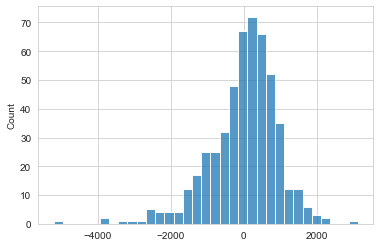

In [76]:
res = (y_train - y_train_pred)
sns.histplot(res)
plt.show()

- Observations:- The Residuals are normally distributed around a Mean "0"

## Preparing the Test data for Residual Analysis and R2 Score Analysis

In [77]:
# Loading the data for Normalisation

c = ["yr", "atemp", "windspeed","summer", "Jan", "winter","Aug","Sep","hum"]
x2_test =  x_test[c]
x2_test

,yr,atemp,windspeed,summer,Jan,winter,Aug,Sep,hum
184,0,33.27085,5.459106,0,0,0,0,0,63.7917
535,1,36.04875,7.625404,1,0,0,0,0,59.2083
299,0,22.85230,13.250121,0,0,1,0,0,81.2917
221,0,34.24915,13.417286,0,0,0,1,0,42.4167
152,0,32.19710,19.583229,1,0,0,0,0,30.5000
...,...,...,...,...,...,...,...,...,...
702,1,23.45270,11.666643,0,0,1,0,0,73.3750
127,0,25.94665,5.000712,1,0,0,0,0,63.1667
640,1,29.95665,4.458569,0,0,1,0,0,79.3750
72,0,16.60000,9.174042,0,0,0,0,0,49.6957


In [78]:
x2_test_sm = sm.add_constant(x2_test)
x2_test_sm

,const,yr,atemp,windspeed,summer,Jan,winter,Aug,Sep,hum
184,1.0,0,33.27085,5.459106,0,0,0,0,0,63.7917
535,1.0,1,36.04875,7.625404,1,0,0,0,0,59.2083
299,1.0,0,22.85230,13.250121,0,0,1,0,0,81.2917
221,1.0,0,34.24915,13.417286,0,0,0,1,0,42.4167
152,1.0,0,32.19710,19.583229,1,0,0,0,0,30.5000
...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,23.45270,11.666643,0,0,1,0,0,73.3750
127,1.0,0,25.94665,5.000712,1,0,0,0,0,63.1667
640,1.0,1,29.95665,4.458569,0,0,1,0,0,79.3750
72,1.0,0,16.60000,9.174042,0,0,0,0,0,49.6957


In [79]:
# Normalising the Test data (independent variables)

n = ["atemp","windspeed","hum"]

x2_test_sm[n] = scalar.transform(x2_test_sm[n])
x2_test_sm.describe()

,const,yr,atemp,windspeed,summer,Jan,winter,Aug,Sep,hum
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.532847,0.129824,0.263636,0.077273,0.236364,0.059091,0.086364,1.896308
std,0.0,0.500809,0.217401,0.051252,0.441609,0.267633,0.425817,0.236333,0.281541,0.462995
min,1.0,0.000000,0.025950,0.015460,0.000000,0.000000,0.000000,0.000000,0.000000,0.724590
25%,1.0,0.000000,0.344870,0.093068,0.000000,0.000000,0.000000,0.000000,0.000000,1.556837
50%,1.0,0.000000,0.544652,0.125596,0.000000,0.000000,0.000000,0.000000,0.000000,1.856980
75%,1.0,1.000000,0.713308,0.158544,1.000000,0.000000,0.000000,0.000000,0.000000,2.225046
max,1.0,1.000000,0.980934,0.288534,1.000000,1.000000,1.000000,1.000000,1.000000,3.029478


In [80]:
#  predictingt the responise variable using Test input data

x2_test_sm = x2_test_sm.drop(["hum"], axis=1)
y_test_pred = lr_model_2.predict(x2_test_sm)

## Residual Analysis for Test Data

In [81]:
# Residual for test data response

res = y_test - y_test_pred

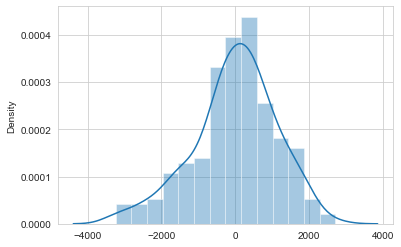

In [82]:
#  Visualising the Residuals on a histogram

sns.distplot(res)
plt.show()

- Observations:- The Residuals are normally distributed around a Mean "0"

In [83]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_test_pred)

print("R2 Score of Model on Test Data:- ",round(r2_score, 2))
print("R2 Score of Model on Train Data:- ", 0.76)

print("Deviation is ", round((1- (0.74/0.76)),2),"%", ", Since the devistion is within 5% Marging the Model is assumed to be performing Good")

R2 Score of Model on Test Data:-  0.65
R2 Score of Model on Train Data:-  0.76
Deviation is  0.03 % , Since the devistion is within 5% Marging the Model is assumed to be performing Good


In [84]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          7.03e-153
Time:                        16:42:03   Log-Likelihood:                -4216.0
No. Observations:                 510   AIC:                             8450.
Df Residuals:                     501   BIC:                             8488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.3687    199.816      5.046      0.000     615.788    1400.950
yr          2087.0230     84.760     24.623      0.000    1920.495    2253.552
atemp       4664.1920    264.720     17.619      0.000    4144.094    5184.290
windspeed  -1393.0314    261.468     -5.328      0.000   -1906.740    -879.323
Jan         -419.6144    183.507     -2.287      0.023    -780.152     -59.077
summer       724.0930    117.635      6.155      0.000     492.975     955.211
winter       879.0834    118.374      7.426      0.000     646.513    1111.654
Aug          482.7910    168.795      2.860      0.004     151.158     814.424
Sep          810.8823    168.536      4.811      0.000     479.758    1142.006
==============================================================================
Omnibus:                      100.534   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.676
Skew:                          -0.966   Prob(JB):                     2.76e-59
Kurtosis:                       5.992   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# Linear Model Intrepretation:- 

- $cnt =  1008.37 + 2087.02(yr) + 4664.19(atemp) - 1393.03(windspeed) - 419.61(Jan) + 724.09(summer) + 879.08(winter) + 482.79(Aug) + 810.88(Sep)$